In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('bank_note_data.csv')
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Image.Var   1372 non-null   float64
 1   Image.Skew  1372 non-null   float64
 2   Image.Curt  1372 non-null   float64
 3   Entropy     1372 non-null   float64
 4   Class       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
features=list(data.columns)[:-1]
target=list(data.columns)[-1]
print(features)
print(target)

['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy']
Class


In [5]:
from sklearn.preprocessing import StandardScaler
data_copy=data.copy()
sc=StandardScaler()
data_copy[features]=sc.fit_transform(data[features])
data_copy

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0
...,...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996,1
1368,-0.641313,-1.158984,1.179023,0.730127,1
1369,-1.472357,-2.621646,3.759017,-0.754884,1
1370,-1.406693,-1.756471,2.552043,-0.043158,1


## t-Distribution Stochartic Neighbour Encoding

In [6]:
from sklearn.manifold import TSNE
tsne=TSNE(learning_rate=100,n_components=2)
x_tsne=tsne.fit_transform(data_copy)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [7]:
y=data[target]

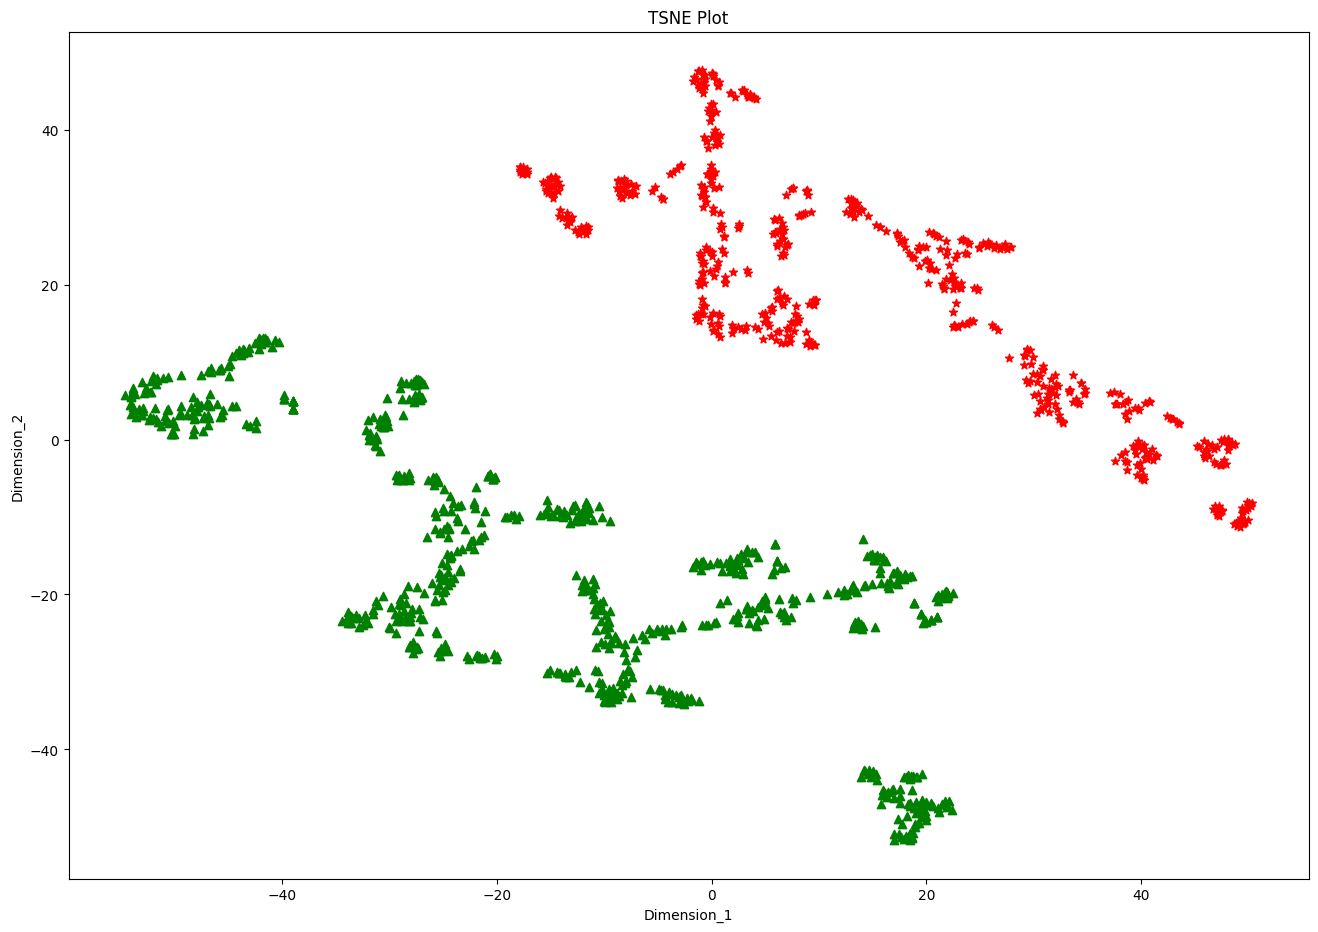

In [8]:
plt.figure(figsize=(16,11))
plt.scatter(x_tsne[np.where(y==0), 0], x_tsne[np.where(y==0), 1], color = 'g', marker = "^")
plt.scatter(x_tsne[np.where(y==1), 0], x_tsne[np.where(y==1), 1], color = 'r', marker = "*")

plt.xlabel("Dimension_1")
plt.ylabel("Dimension_2")
plt.title("TSNE Plot")
plt.show()